You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/platforms-and-tools/blob/main/Python_Crash_course_2020/7-Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series with Pandas in Python

In this section we are going to learn how to handle time series data in Python:

Basic topics to be covered:

* datetime module
* numpy datetime arrays
* pandas datetime
* pandas datareader
    1. Resampling
    2. Time shifting (leads and lags)
    3. Rolling windows and Expanding windows
   

#### datetime module

In [255]:
from datetime import datetime

In [256]:
year =2021
month= 1
day =1

In [257]:
my_date = datetime(year, month, day)
my_date

datetime.datetime(2021, 1, 1, 0, 0)

In [258]:
# we can extract any information from our datetime object. 
my_date.month

1

In [259]:
my_date.isoweekday()
# Monday == 1 ... Sunday == 7 so 5 means Friday

5

In [260]:
datetime.today()

datetime.datetime(2023, 1, 24, 0, 23, 35, 193717)

#### Numpy datetime arrays
NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.


In [261]:
import numpy as np

In [262]:
# creating datetime array
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64')

array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')

In [263]:
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[Y]')

array(['2020', '2021'], dtype='datetime64[Y]')

In [264]:
# np.arange(start, stop, step)
np.arange('2021-01-01', '2021-01-10', dtype='datetime64[D]')

array(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-09'], dtype='datetime64[D]')

In [265]:
# available dtypes are: D, h, m, s, ms, W, M, Y and etc. 
np.arange('2023-01-10', datetime.today(), dtype='datetime64[D]')

array(['2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
       '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
       '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
       '2023-01-22', '2023-01-23'], dtype='datetime64[D]')

#### Pandas datetime
Usually we will work with time series as a datetime index in pandas dataframes. pandas has a lot of built in functions and methods to work with time series!

In [266]:
import pandas as pd

In [267]:
pd.date_range(start='2023-01-01', end='2023-01-20', freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20'],
              dtype='datetime64[ns]', freq='D')

In [268]:
# let's creat an index first. For example the first week of 2021
index = pd.date_range('2023-01-01', periods=7, freq='B')
index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='B')

here is a list of frequency parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [269]:
# if you want to create an index for specific days, there are two ways to do that:
custom_index = pd.to_datetime(['2021-01-06', '2021-01-21'])
custom_index

DatetimeIndex(['2021-01-06', '2021-01-21'], dtype='datetime64[ns]', freq=None)

In [270]:
# or alternatively, we could pass a numpy array to pd.DatetimeIndex()
custom_index = pd.DatetimeIndex(np.array(['2021-01-01', '2021-01-19']))
custom_index 

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

Now let's explore some of pandas datetime functions:

In [271]:
# creating a time series data frame
# pd.DateFrame( data, index, column names)
df = pd.DataFrame(data=['first day of the year', 'first day of school'],index= custom_index, columns= ['Event'])
df

,Event
2021-01-01,first day of the year
2021-01-19,first day of school


In [272]:
df.columns

Index(['Event'], dtype='object')

In [273]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

In [274]:
df.index.max()

Timestamp('2021-01-19 00:00:00')

In [275]:
df.index.argmax()

1

#### Pandas datareader

In [276]:
import pandas_datareader.data as web

In [277]:
start = pd.to_datetime('2021-01-01')
end   = pd.to_datetime('today')
end

Timestamp('2023-01-24 00:23:36.159237')

In [278]:
Ticker =  "TSLA AAPL".split(" ")
Ticker

['TSLA', 'AAPL']

In [279]:
#Stocks = web.DataReader(name= Ticker, data_source= 'yahoo', start=start, end= end)
#Stocks.tail()

In [280]:
# if pandas_datareader didn't work, try yfinance. On Google colab, run the following:
# !pip install yfinance

# On your local computer, simply install yfinance package using pip install yfinance. 

In [281]:
import yfinance as yf

In [282]:
start

Timestamp('2021-01-01 00:00:00')

In [283]:
end

Timestamp('2023-01-24 00:23:36.159237')

In [284]:
Stocks = yf.download(Ticker, start, end)
Stocks.tail()

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2023-01-17  135.940002  131.490005  135.940002  131.490005  137.289993   
2023-01-18  135.210007  128.779999  135.210007  128.779999  138.610001   
2023-01-19  135.270004  127.169998  135.270004  127.169998  136.250000   
2023-01-20  137.869995  133.419998  137.869995  133.419998  138.020004   
2023-01-23  141.110001  143.750000  141.110001  143.750000  143.320007   

                               Low                    Open              \
                  TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2023-01-17  131.699997  134.130005  125.019997  134.830002  125.699997   
2023-01-18  136.679993  135.029999  127.010002  136.820007  136.559998   
2023-01-19  129.990005  133.770004  124.309998  134.080002  127.260002   
2023-01-20  133.509995  134.220001  127.349998  135.279999  128.679993   
2023-01-23  145.380005  137.899994  134.270004  138.119995  135.869995   

              Volume             
                AAPL       TSLA  
Date                             
2023-01-17  63646600  186477000  
2023-01-18  69672800  195680300  
2023-01-19  58280400  170291900  
2023-01-20  79972200  138429900  
2023-01-23  81698400  202640900

In [285]:
df= round(Stocks['Adj Close'],2)
df.tail()

,AAPL,TSLA
Date,,
2023-01-17,135.94,131.49
2023-01-18,135.21,128.78
2023-01-19,135.27,127.17
2023-01-20,137.87,133.42
2023-01-23,141.11,143.75


In [286]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17', '2023-01-18', '2023-01-19',
               '2023-01-20', '2023-01-23'],
              dtype='datetime64[ns]', name='Date', length=517, freq=None)

In [287]:
import matplotlib.pyplot as plt

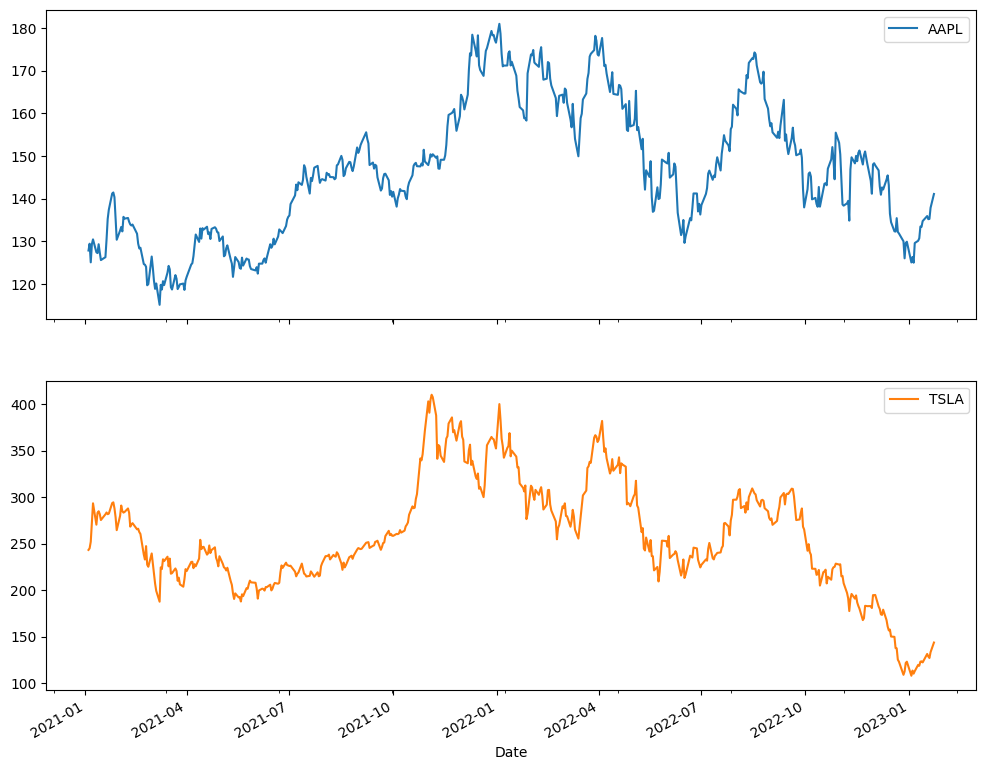

In [288]:
df.plot(subplots=True, figsize=(12,10))
plt.show()

In [289]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17', '2023-01-18', '2023-01-19',
               '2023-01-20', '2023-01-23'],
              dtype='datetime64[ns]', name='Date', length=517, freq=None)

#### 1.Resampling
Resampling data by different rules (frequencies). Here is the list of frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [290]:
# example: resampling data by month end frequency
df.resample(rule='M').mean()

,AAPL,TSLA
Date,,
2021-01-31,131.457368,276.258947
2021-02-28,130.123158,264.757368
2021-03-31,120.604348,218.934348
2021-04-30,130.443333,236.539048
2021-05-31,125.636500,205.584000
2021-06-30,128.826364,208.973636
2021-07-31,143.875714,219.711905
2021-08-31,147.068182,235.080455
2021-09-30,147.236190,251.317143


you can resample based on custom resampling functions as well

**example 1: plot the normalized monthly average price.**

In [291]:
df.resample(rule='M').mean().apply(lambda x: x/x[0])

,AAPL,TSLA
Date,,
2021-01-31,1.000000,1.000000
2021-02-28,0.989851,0.958367
2021-03-31,0.917441,0.792497
2021-04-30,0.992286,0.856222
2021-05-31,0.955720,0.744171
2021-06-30,0.979986,0.756441
2021-07-31,1.094467,0.795311
2021-08-31,1.118752,0.850942
2021-09-30,1.120030,0.909716


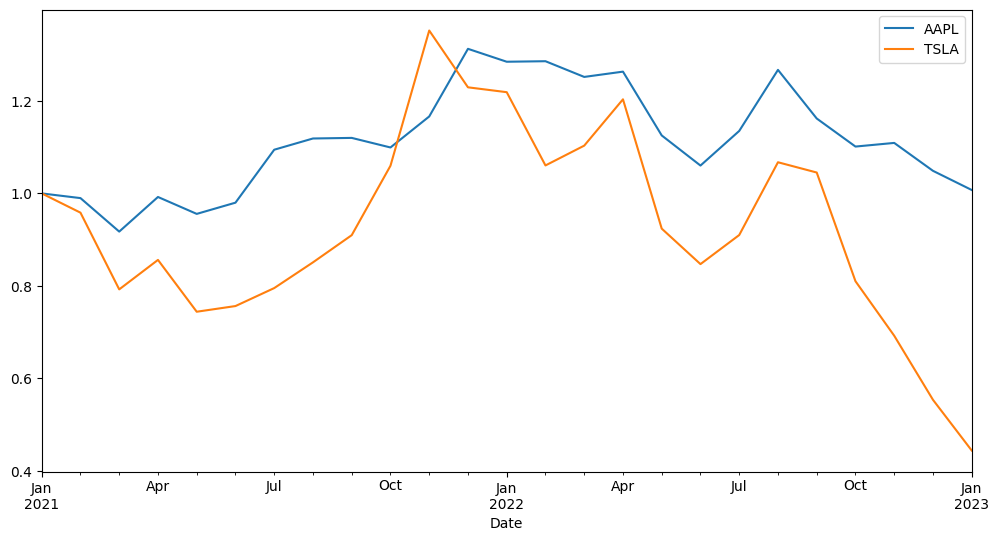

In [292]:
df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))
plt.show()

In [293]:
# example 2: draw a barplot comparing monthly returns between Tesla and Apple

df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)

,AAPL,TSLA
Date,,
2021-01-31,0.019708,0.087355
2021-02-28,-0.094681,-0.195649
2021-03-31,-0.044125,-0.070319
2021-04-30,0.068764,0.072083
2021-05-31,-0.058173,-0.087122
2021-06-30,0.102029,0.089436
2021-07-31,0.062537,0.013719
2021-08-31,0.044922,0.036693
2021-09-30,-0.072188,0.056355


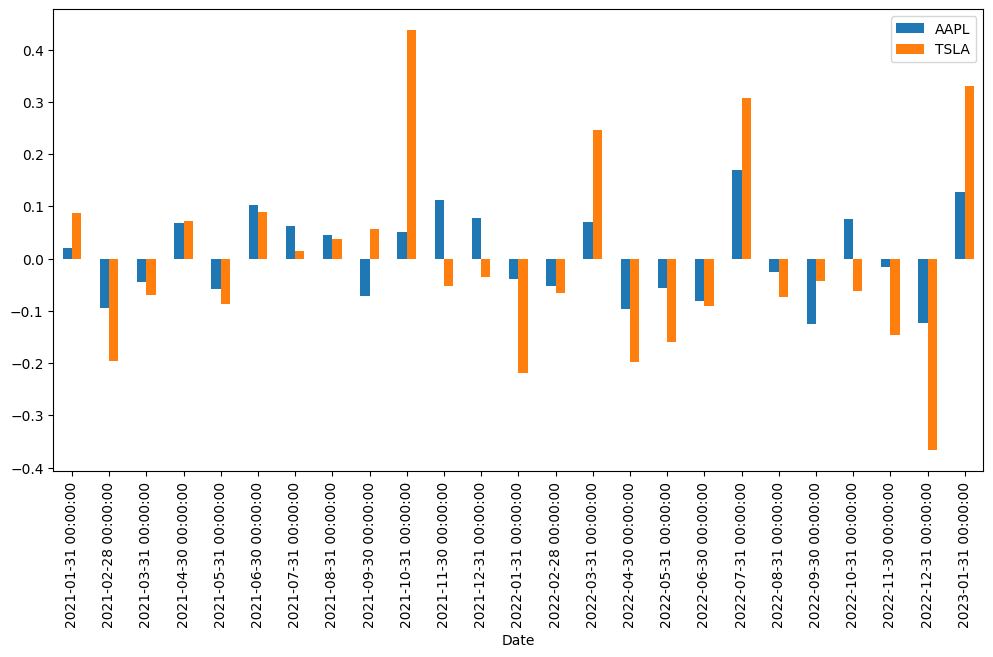

In [294]:
df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1).plot.bar(figsize=(12,6))
plt.show()

#### 2. Time shifting (leads and lags)


In [295]:
# shift forward
df_apple= pd.DataFrame(df['AAPL'])
df_apple.head()

,AAPL
Date,
2021-01-04,127.87
2021-01-05,129.46
2021-01-06,125.10
2021-01-07,129.37
2021-01-08,130.48


In [296]:
df_apple['lag(t-1)']= df_apple['AAPL'].shift(1)
df_apple['lead(t+1)']= df_apple['AAPL'].shift(-1)

df_apple.head()

,AAPL,lag(t-1),lead(t+1)
Date,,,
2021-01-04,127.87,NaN,129.46
2021-01-05,129.46,127.87,125.10
2021-01-06,125.10,129.46,129.37
2021-01-07,129.37,125.10,130.48
2021-01-08,130.48,129.37,127.45


#### 3. Rolling windows and Expanding windows

Let's construct a 30 day simple moving averages for Tesla!

In [297]:
df.head()

,AAPL,TSLA
Date,,
2021-01-04,127.87,243.26
2021-01-05,129.46,245.04
2021-01-06,125.10,251.99
2021-01-07,129.37,272.01
2021-01-08,130.48,293.34


In [298]:
df.rolling(window=5).mean().head()

,AAPL,TSLA
Date,,
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
2021-01-08,128.456,261.128


In [299]:
df['TSLA_MA(30)']=df['TSLA'].rolling(30).mean()

In [300]:
df.head()

,AAPL,TSLA,TSLA_MA(30)
Date,,,
2021-01-04,127.87,243.26,NaN
2021-01-05,129.46,245.04,NaN
2021-01-06,125.10,251.99,NaN
2021-01-07,129.37,272.01,NaN
2021-01-08,130.48,293.34,NaN


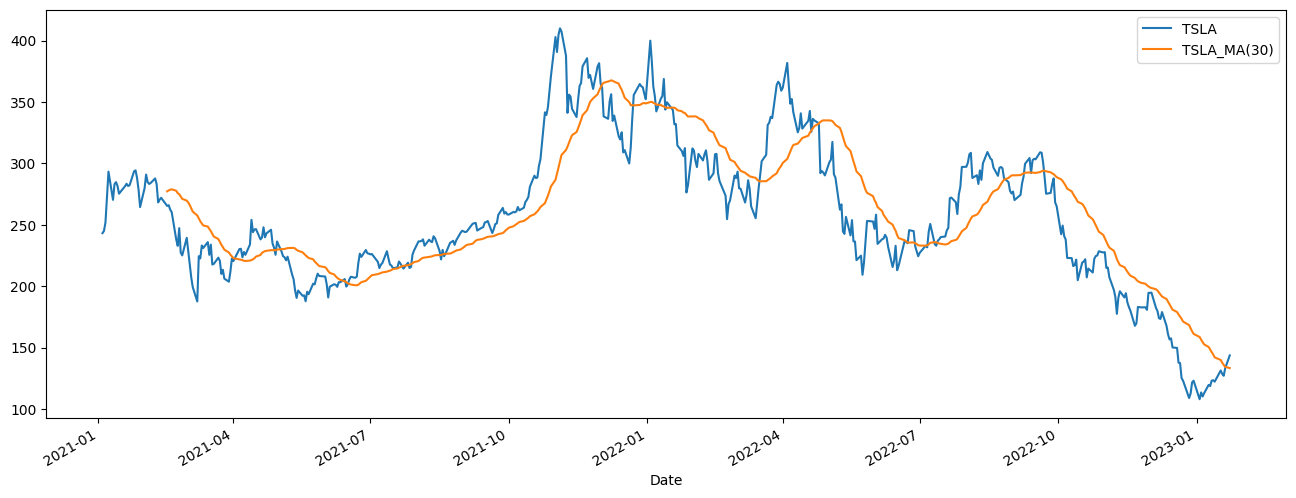

In [301]:
df[['TSLA', 'TSLA_MA(30)']].plot(figsize=(16,6))

plt.show()

Let's construct an expanding averages for AAPL!

In [302]:
df['AAPL'].head()

Date
2021-01-04    127.87
2021-01-05    129.46
2021-01-06    125.10
2021-01-07    129.37
2021-01-08    130.48
Name: AAPL, dtype: float64

In [303]:
df['AAPL'].expanding().mean().head()

Date
2021-01-04    127.870000
2021-01-05    128.665000
2021-01-06    127.476667
2021-01-07    127.950000
2021-01-08    128.456000
Name: AAPL, dtype: float64

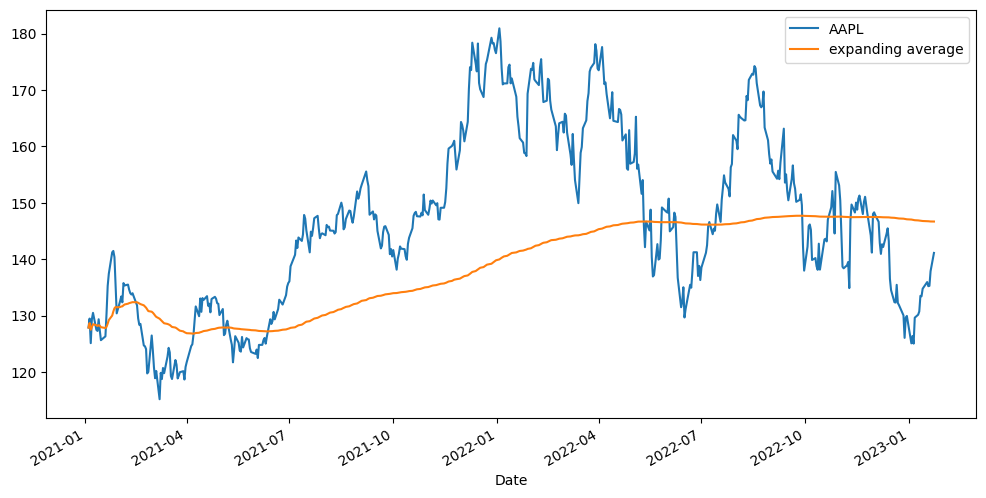

In [304]:
df['expanding average']=df['AAPL'].expanding().mean()
df[['AAPL','expanding average']].plot(figsize=(12,6))

plt.show()